In [26]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

from tensorflow.keras.utils import to_categorical

from medmnist import BloodMNIST

In [19]:
# Importing data

INPUT_N = 28

train_dataset = BloodMNIST(split="train", download=True, size=INPUT_N)

X_train_full = np.zeros([len(train_dataset), INPUT_N, INPUT_N, 3]) 

y_train_full = np.zeros([len(train_dataset), 1])

for i in range(len(train_dataset)):
    x, y_train_full[i] = train_dataset[i]
    X_train_full[i] = np.array(x)/255.0
    
i_val = int(len(train_dataset)*0.7)

X_train = X_train_full[:i_val]
y_train = y_train_full[:i_val]

X_val = X_train_full[i_val:]
y_val = y_train_full[i_val:]

print('Number of samples in train dataset: '+str(len(train_dataset)))

print('Shape of data in train dataset: '+str(X_train.shape)+" "+str(y_train.shape))

print('Shape of data in validation dataset: '+str(X_val.shape)+" "+str(y_val.shape))

test_dataset = BloodMNIST(split="test", download=True, size=INPUT_N)

X_test = np.zeros([len(test_dataset), INPUT_N, INPUT_N, 3])

y_test = np.zeros([len(test_dataset), 1])

for i in range(len(test_dataset)):
    x, y_test[i] = test_dataset[i]
    X_test[i] = np.array(x)/255.0

print('Number of samples in test dataset: '+str(len(test_dataset)))

print('Shape of data in test dataset: '+str(X_test.shape)+" "+str(y_test.shape))

classes_labels = ['Basófilos - 0', 'Eosinófilos - 1', 'Eritroblastos - 2', 'Granulócitos imaturos - 3',
                  'Linfócitos - 4', 'Monócitos - 5', 'Neutrófilos - 6', 'Plaquetas - 7']


Using downloaded and verified file: /home/toffanetto/.medmnist/bloodmnist.npz
Number of samples in train dataset: 11959
Shape of data in train dataset: (8371, 28, 28, 3) (8371, 1)
Shape of data in validation dataset: (3588, 28, 28, 3) (3588, 1)
Using downloaded and verified file: /home/toffanetto/.medmnist/bloodmnist.npz
Number of samples in test dataset: 3421
Shape of data in test dataset: (3421, 28, 28, 3) (3421, 1)


In [37]:
def build_and_test_cnn(n_kernels=32, kernel_size=5, activation_fnc="relu", pooling="max", optimizer="sgd", epochs=300, verbose=1):
    
    tf.keras.backend.clear_session() # Free memory and clear old models in session
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=n_kernels, kernel_size=kernel_size, strides=1,
                                     padding="SAME", activation=activation_fnc, input_shape=(INPUT_N, INPUT_N, 3)))   
    if(pooling == "avg"):
        model.add(tf.keras.layers.AveragePooling2D(pool_size=2))
    if(pooling == "max"):
        model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(8, activation="softmax"))
    model.summary()
    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    
    checkpoint_cb = keras.callbacks.ModelCheckpoint("../model/cnn_shallow/cnn_"+str(n_kernels)+"_"+str(kernel_size)+"x"+str(kernel_size)+"_"+(activation_fnc)+"_"+str(pooling)+"_"+(optimizer)+".weights.h5",
                                                    save_best_only=True, save_weights_only=True)
    
    history = model.fit(X_train, y_train, epochs=epochs,
                        validation_data=(X_val, y_val),
                        callbacks=[checkpoint_cb], verbose=verbose)
    
    model.load_weights("../model/cnn_shallow/cnn_"+str(n_kernels)+"_"+str(kernel_size)+"x"+str(kernel_size)+"_"+(activation_fnc)+"_"+str(pooling)+"_"+(optimizer)+".weights.h5")
    
    val_accuracy = max(history.history['val_accuracy'])
    
    val_loss = history.history['val_loss'][history.history['val_accuracy'].index(val_accuracy)]
    
    model_specs = dict(n_kernels=n_kernels,
                       kernel_size=kernel_size,
                       activation_fnc=activation_fnc,
                       pooling=pooling,
                       optimizer=optimizer,
                       loss=val_loss,
                       accuracy=val_accuracy)
    
    return model_specs, history, model

def restoreModel(n_kernels=32, kernel_size=5, activation_fnc="relu", pooling="max", optimizer="sgd"):
    tf.keras.backend.clear_session() # Free memory and clear old models in session
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=n_kernels, kernel_size=kernel_size, strides=1,
                                     padding="SAME", activation=activation_fnc, input_shape=(INPUT_N, INPUT_N, 3)))   
    if(pooling == "avg"):
        model.add(tf.keras.layers.AveragePooling2D(pool_size=2))
    if(pooling == "max"):
        model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(8, activation="softmax"))
    model.summary()
    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    
    model.load_weights("../model/cnn_shallow/cnn_"+str(n_kernels)+"_"+str(kernel_size)+"x"+str(kernel_size)+"_"+(activation_fnc)+"_"+str(pooling)+"_"+(optimizer)+".weights.h5")
    
    return model

/home/toffanetto/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │        50,184 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,616 (205.53 KB)

 Trainable params: 52,616 (205.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3069 - loss: 1.8402 - val_accuracy: 0.4936 - val_loss: 1.3604
Epoch 2/2
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5356 - loss: 1.2551 - val_accuracy: 0.6143 - val_loss: 1.0726
{'accuracy': 0.6142697930335999,
 'activation_fnc': 'relu',
 'kernel_size': 5,
 'loss': 1.0726261138916016,
 'n_kernels': 32,
 'optimizer': 'sgd',
 'pooling': 'max'}


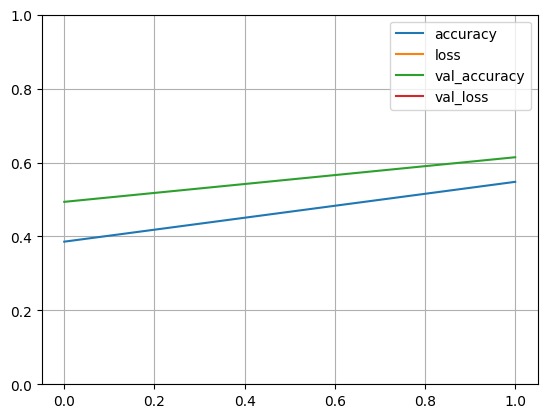

In [38]:
# Test custom model

model_specs, history, model = build_and_test_cnn(epochs=200, pooling="max", optimizer="sgd")

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.ylim([0,1])

pprint.pprint(model_specs)

In [39]:
epochs = 200

n_kernels_search = [32, 64, 128, 256, 1024]

kernel_size_search = [3, 5, 7, 9]

In [40]:
############################################

models = []
historys = []

for kernel_size in kernel_size_search:

    for n_kernel in n_kernels_search:
        print("|++| Training for "+str(n_kernel)+" kernels |++|\n")
        model_specs, history, _ = build_and_test_cnn(n_kernels=n_kernel,epochs=epochs, verbose=0)
        models.append(model_specs)
        historys.append(history)
        
        pprint.pprint(model_specs)
        
        models_backup = open("../model/cnn_shallow/models_search_backup.txt", "a")
        models_backup.write(str(model_specs)+'\n')
        models_backup.close()
        
    

|++| Training for 32 kernels |++|



/home/toffanetto/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │        50,184 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,616 (205.53 KB)

 Trainable params: 52,616 (205.53 KB)

 Non-trainable params: 0 (0.00 B)

{'accuracy': 0.906633198261261,
 'activation_fnc': 'relu',
 'kernel_size': 5,
 'loss': 0.3038339614868164,
 'n_kernels': 32,
 'optimizer': 'sgd',
 'pooling': 'max'}
|++| Training for 64 kernels |++|



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       100,360 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,224 (411.03 KB)

 Trainable params: 105,224 (411.03 KB)

 Non-trainable params: 0 (0.00 B)

{'accuracy': 0.9055184125900269,
 'activation_fnc': 'relu',
 'kernel_size': 5,
 'loss': 0.3056585192680359,
 'n_kernels': 64,
 'optimizer': 'sgd',
 'pooling': 'max'}
|++| Training for 128 kernels |++|



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 128)    │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       200,712 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,440 (822.03 KB)

 Trainable params: 210,440 (822.03 KB)

 Non-trainable params: 0 (0.00 B)

KeyboardInterrupt: 